# Avaliação : 

O objetivo deste projeto é criar um modelo em que classifica um comentário em tóxicos ou não-tóxicos. Serão avaliados diferentes aspectos neste projeto: tanto a capacidade de apresentar e interpretar informações, como o pré-processamento, treinamento e avaliação dos resultados

Library Imports

In [35]:
import pandas as pd 
import numpy as np 
# Graphics tools 
import matplotlib.pyplot as plt
import seaborn as sns
# Vader SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Metrics for analyze
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
# NLP tools
import re
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Standard Libs 
from collections import Counter


# Conjunto de dados:

O conjunto de dados a ser utilizado nesta avaliação é uma sub-amostra de um conjunto de dados público disponível no Kaggle. Ele é composto por comentários da Wikipedia que foram rotulados em diferentes tipos de toxidade. O conjunto de dados foi adaptado para ter somente comentários tóxicos e não-tóxicos.


Train DataSet import 


In [3]:
train_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\train_binary_small.csv')
train_df.head(10)

,id,comment_text,Toxic
0,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,Toxic
1,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,00b77cb600c897b4,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,00c0b8ed05ed7833,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,00d7a73eb033ee5e,"Have you seen the reference to their claim, yo...",Toxic
5,011d0c0a6c8e5765,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic
6,0122aba9f97885cd,There are many broken nostrils in this pancreas,Non-Toxic
7,016aa1af4fa90e8b,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic
8,019ab9a91e7fcdbe,Are you fucker mother fucker have nothing to d...,Toxic
9,01ce75675a501e50,"""\\nYou wasted your own time! Take this advice...",Toxic


Test DataSet import 


In [4]:
test_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\test_binary_small.csv')
test_df.head(10)

,id,comment_text,Toxic
0,00091c35fa9d0465,"== Arabs are committing genocide in Iraq, but ...",Toxic
1,0013a435effa29bd,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic
2,001eff4007dbb65b,"::No, he is an arrogant, self serving, immatur...",Toxic
3,008eb47c4684d190,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic
4,00991697be5ed76a,Simple: You are stupid!,Toxic
5,00bee0148b44976e,""" \n\n Please do not vandalize pages, as you ...",Non-Toxic
6,0155d282a0ae2760,you fucking braindead oroszka 50% of the syria...,Toxic
7,0164123c08c9fcbd,""" \n :::::""""This I hate Eagles 247 for. since ...",Toxic
8,0173dd710621e443,""" \n ::Can you cite any policies? If not, why...",Toxic
9,01f731449eb8b6b3,== WIKIPEDIA IS FOR DICKSHITS LIKE U == \n\n R...,Toxic


# Data analysis:

Checking null values

In [5]:
print('Train dataset : \n',train_df.isnull().sum())
print('Test dataset : \n',test_df.isnull().sum())

Train dataset : 
 id              0
comment_text    0
Toxic           0
dtype: int64
Test dataset : 
 id              0
comment_text    0
Toxic           0
dtype: int64


In [6]:
print('Train dataset : ',train_df.info())
print('Test dataset :',test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2000 non-null   object
 1   comment_text  2000 non-null   object
 2   Toxic         2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB
Train dataset :  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1500 non-null   object
 1   comment_text  1500 non-null   object
 2   Toxic         1500 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB
Test dataset : None


Target Count 

Train dataset:

Toxic        1500
Non-Toxic     500
Name: Toxic, dtype: int64


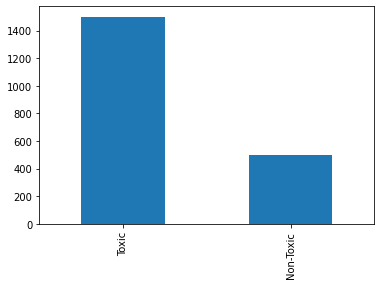

In [7]:
train_df.Toxic.value_counts().plot(kind='bar') 
print(train_df.Toxic.value_counts())

Test dataset:

Toxic        1000
Non-Toxic     500
Name: Toxic, dtype: int64


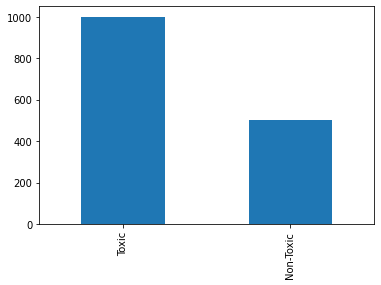

In [8]:
test_df.Toxic.value_counts().plot(kind='bar') 
print(test_df.Toxic.value_counts())

> We can see that we have unbalanced data. We have more data classified as toxic than non-toxic

Removing ID 

In [9]:
train_df.drop(columns=['id'],inplace=True)
test_df.drop(columns=['id'],inplace=True)

Train:

In [10]:
# Train dataset check 
train_df.head(10)

,comment_text,Toxic
0,All of my edits are good. Cunts like you who ...,Toxic
1,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,"Have you seen the reference to their claim, yo...",Toxic
5,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic
6,There are many broken nostrils in this pancreas,Non-Toxic
7,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic
8,Are you fucker mother fucker have nothing to d...,Toxic
9,"""\\nYou wasted your own time! Take this advice...",Toxic


Test:

In [11]:
# Test dataset check 
test_df.head(10)

,comment_text,Toxic
0,"== Arabs are committing genocide in Iraq, but ...",Toxic
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic
2,"::No, he is an arrogant, self serving, immatur...",Toxic
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic
4,Simple: You are stupid!,Toxic
5,""" \n\n Please do not vandalize pages, as you ...",Non-Toxic
6,you fucking braindead oroszka 50% of the syria...,Toxic
7,""" \n :::::""""This I hate Eagles 247 for. since ...",Toxic
8,""" \n ::Can you cite any policies? If not, why...",Toxic
9,== WIKIPEDIA IS FOR DICKSHITS LIKE U == \n\n R...,Toxic


Analysing duplicates

Train:

In [12]:
print('Duplicates sum :', train_df.duplicated().sum())
train_df.drop_duplicates()

Duplicates sum : 0


,comment_text,Toxic
0,All of my edits are good. Cunts like you who ...,Toxic
1,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,"Have you seen the reference to their claim, yo...",Toxic
...,...,...
1995,"""\nARE YOU FUCKING RETARDED?\n\nPlease do not ...",Toxic
1996,"Shut up, you button!",Toxic
1997,Hey alabamoy boy why dont you stick your head ...,Toxic
1998,"Walter Mercado \n\nAntonio, quite frankly, you...",Toxic


Test:

In [13]:
print('Duplicates sum :', test_df.duplicated().sum())
test_df.drop_duplicates()

Duplicates sum : 0


,comment_text,Toxic
0,"== Arabs are committing genocide in Iraq, but ...",Toxic
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic
2,"::No, he is an arrogant, self serving, immatur...",Toxic
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic
4,Simple: You are stupid!,Toxic
...,...,...
1495,This is a bit of a delayed response (what's fi...,Non-Toxic
1496,I guess what I said a few months back about th...,Toxic
1497,Baylor kids like to kill themselves,Toxic
1498,THIS IS TOM YA SOOOO AWESOME LOLOLOLOLOLOLOLOL...,Toxic


# Etapa de experimentos com diferentes modelos
#### Devem ser realizados experimentos iniciais considerando diferentes métodos de classificação para determinar o modelo mais adequado para o problema em questão:

Without preprocecssing using Vader 

> I understand that VADER was built to perform a sentiment analysis without the need for preprocessing, we will test this tool with the text as it was made available.

In [14]:
def Applying_Vader(DataFrame,colun):
    sid = SentimentIntensityAnalyzer()
    DataFrame['scores'] = DataFrame[colun].apply(lambda colun: sid.polarity_scores(colun))
    DataFrame['compound'] = DataFrame['scores'].apply(lambda scores: scores['compound'])    
    return DataFrame


In [15]:
# Applying on train df dataset
train_df = Applying_Vader(train_df,'comment_text')
train_df.head(15)

,comment_text,Toxic,scores,compound
0,All of my edits are good. Cunts like you who ...,Toxic,"{'neg': 0.19, 'neu': 0.618, 'pos': 0.193, 'com...",-0.2023
1,you are a stupid fuck \n\nand your mother's cu...,Toxic,"{'neg': 0.708, 'neu': 0.292, 'pos': 0.0, 'comp...",-0.9022
2,"""\n\nAnd you are? Let me know when you've craw...",Toxic,"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",-0.8225
3,Fuck off\n\nYou are NOT an administrator. You ...,Toxic,"{'neg': 0.228, 'neu': 0.772, 'pos': 0.0, 'comp...",-0.5750
4,"Have you seen the reference to their claim, yo...",Toxic,"{'neg': 0.054, 'neu': 0.946, 'pos': 0.0, 'comp...",-0.6440
5,I NEVER FUCKING MADE THIS MOTHER FUCKING ARTIC...,Toxic,"{'neg': 0.26, 'neu': 0.74, 'pos': 0.0, 'compou...",-0.8107
6,There are many broken nostrils in this pancreas,Non-Toxic,"{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...",-0.4767
7,"""\n\nElvis... Crying in the Chapel Feudalist """,Non-Toxic,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",-0.6124
8,Are you fucker mother fucker have nothing to d...,Toxic,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",-0.9186
9,"""\\nYou wasted your own time! Take this advice...",Toxic,"{'neg': 0.252, 'neu': 0.686, 'pos': 0.062, 'co...",-0.8614


Analyzing VADER result on train data frame 

In [16]:
def vader_result(DataFrame,posLabel,negLabel,label):
    DataFrame['compound_result'] = DataFrame['compound'].apply(lambda comp: posLabel if comp >=0 else negLabel)
    return classification_report(DataFrame[label],DataFrame['compound_result']), accuracy_score(DataFrame[label],DataFrame['compound_result'])

In [17]:
class_report,acc = vader_result(train_df,'Non-Toxic','Toxic','Toxic')

In [18]:
print('Accuracy Score result: ', acc)
print(class_report)

Accuracy Score result:  0.7175
              precision    recall  f1-score   support

   Non-Toxic       0.46      0.73      0.56       500
       Toxic       0.89      0.71      0.79      1500

    accuracy                           0.72      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.78      0.72      0.73      2000



Analyzing VADER result on test data frame 

In [19]:
# Applying on test df dataset
test_df = Applying_Vader(test_df,'comment_text')
test_df.head(15)

,comment_text,Toxic,scores,compound
0,"== Arabs are committing genocide in Iraq, but ...",Toxic,"{'neg': 0.417, 'neu': 0.542, 'pos': 0.042, 'co...",-0.9081
1,"I'd never think I'd need to say it, but Wikipe...",Non-Toxic,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.4767
2,"::No, he is an arrogant, self serving, immatur...",Toxic,"{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...",-0.7579
3,""" \n\n So, on the tenth anniversary of 9/11, ""...",Toxic,"{'neg': 0.241, 'neu': 0.727, 'pos': 0.032, 'co...",-0.9956
4,Simple: You are stupid!,Toxic,"{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'comp...",-0.5707
5,""" \n\n Please do not vandalize pages, as you ...",Non-Toxic,"{'neg': 0.074, 'neu': 0.845, 'pos': 0.081, 'co...",0.0516
6,you fucking braindead oroszka 50% of the syria...,Toxic,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
7,""" \n :::::""""This I hate Eagles 247 for. since ...",Toxic,"{'neg': 0.199, 'neu': 0.801, 'pos': 0.0, 'comp...",-0.8020
8,""" \n ::Can you cite any policies? If not, why...",Toxic,"{'neg': 0.279, 'neu': 0.665, 'pos': 0.056, 'co...",-0.9788
9,== WIKIPEDIA IS FOR DICKSHITS LIKE U == \n\n R...,Toxic,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.183, 'co...",-0.2960


In [20]:
class_report,acc = vader_result(train_df,'Non-Toxic','Toxic','Toxic')

In [21]:
print('Accuracy Score result: ', acc)
print(class_report)

Accuracy Score result:  0.7175
              precision    recall  f1-score   support

   Non-Toxic       0.46      0.73      0.56       500
       Toxic       0.89      0.71      0.79      1500

    accuracy                           0.72      2000
   macro avg       0.67      0.72      0.68      2000
weighted avg       0.78      0.72      0.73      2000



# Initial Pre-Processing Data


In [22]:
# Concatenating the datasets 
train_df = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\train_binary_small.csv')
test_df  = pd.read_csv(r'C:\Users\Rícharde\Desktop\Python IA\Python-IA-Dell-Lead-\Final\test_binary_small.csv')
df = train_df.append(test_df)
df.head()

C:\Users\Rícharde\AppData\Local\Temp\ipykernel_5152\160245962.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df)


,id,comment_text,Toxic
0,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,Toxic
1,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,Toxic
2,00b77cb600c897b4,"""\n\nAnd you are? Let me know when you've craw...",Toxic
3,00c0b8ed05ed7833,Fuck off\n\nYou are NOT an administrator. You ...,Toxic
4,00d7a73eb033ee5e,"Have you seen the reference to their claim, yo...",Toxic


Expand Contractions:

In [23]:
def expand_contractions(sentence):
    expanded_words = []   
    for word in sentence.split():
        expanded_words.append(contractions.fix(word))  
    return ' '.join(expanded_words)

Lower Case:

In [24]:
def lower_case(sentence):
    sentence = sentence.lower()
    return sentence

Clear Data:

In [25]:
# remove links,dots,commas,numbers 
def clean_text(instance):
    instance = instance.lower()
    instance = re.sub('\[.*?\]', ' ', instance)
    instance = re.sub('https?://\S+|www\.\S+', ' ', instance)
    instance = re.sub('<.*?>+', ' ', instance)
    instance = re.sub('[%s]' % re.escape(string.punctuation), ' ', instance)
    instance = re.sub('\n', '', instance)
    instance = re.sub('\w*\d\w*', ' ', instance)
    return instance

Remove Extra Spaces:



In [26]:
def remove_extra_spaces(instance):
    instance = re.sub(' +', ' ', instance)
    return instance

Running preprocessing

In [27]:
def pre_processing(df,local_data):
    df[local_data] = df[local_data].apply(lambda local_data: expand_contractions(local_data))
    df[local_data] = df[local_data].apply(lambda local_data: lower_case(local_data))
    df[local_data] = df[local_data].apply(lambda local_data: clean_text(local_data))
    df[local_data] = df[local_data].apply(lambda local_data: remove_extra_spaces(local_data))
    return df 

In [28]:
df = pre_processing(df,'comment_text')

> Performing a basic pre-processing so that the data are more clear to perform the EDA. For this, I also thought it was worth joining the two data sets so that we have an overview of all the data used.

# Exploratory data analysis

In [29]:
df.head(10)

,id,comment_text,Toxic
0,0028d62e8a5629aa,all of my edits are good cunts like you who re...,Toxic
1,006e87872c8b370c,you are a stupid fuck and your mother s cunt s...,Toxic
2,00b77cb600c897b4,and you are let me know when you have crawled...,Toxic
3,00c0b8ed05ed7833,fuck off you are not an administrator you do n...,Toxic
4,00d7a73eb033ee5e,have you seen the reference to their claim you...,Toxic
5,011d0c0a6c8e5765,i never fucking made this mother fucking artic...,Toxic
6,0122aba9f97885cd,there are many broken nostrils in this pancreas,Non-Toxic
7,016aa1af4fa90e8b,elvis crying in the chapel feudalist,Non-Toxic
8,019ab9a91e7fcdbe,are you fucker mother fucker have nothing to d...,Toxic
9,01ce75675a501e50,you wasted your own time take this advice wit...,Toxic


In [30]:
def Number_Words(setence):
    return len(setence.split())

# Calculate the number of words 
df['Number Words'] = df['comment_text'].apply(lambda comment_text: Number_Words(comment_text))
df.head(10)

,id,comment_text,Toxic,Number Words
0,0028d62e8a5629aa,all of my edits are good cunts like you who re...,Toxic,56
1,006e87872c8b370c,you are a stupid fuck and your mother s cunt s...,Toxic,11
2,00b77cb600c897b4,and you are let me know when you have crawled...,Toxic,18
3,00c0b8ed05ed7833,fuck off you are not an administrator you do n...,Toxic,19
4,00d7a73eb033ee5e,have you seen the reference to their claim you...,Toxic,78
5,011d0c0a6c8e5765,i never fucking made this mother fucking artic...,Toxic,26
6,0122aba9f97885cd,there are many broken nostrils in this pancreas,Non-Toxic,8
7,016aa1af4fa90e8b,elvis crying in the chapel feudalist,Non-Toxic,6
8,019ab9a91e7fcdbe,are you fucker mother fucker have nothing to d...,Toxic,17
9,01ce75675a501e50,you wasted your own time take this advice wit...,Toxic,36


# Number of words per tweet

<AxesSubplot:xlabel='Number Words', ylabel='Count'>

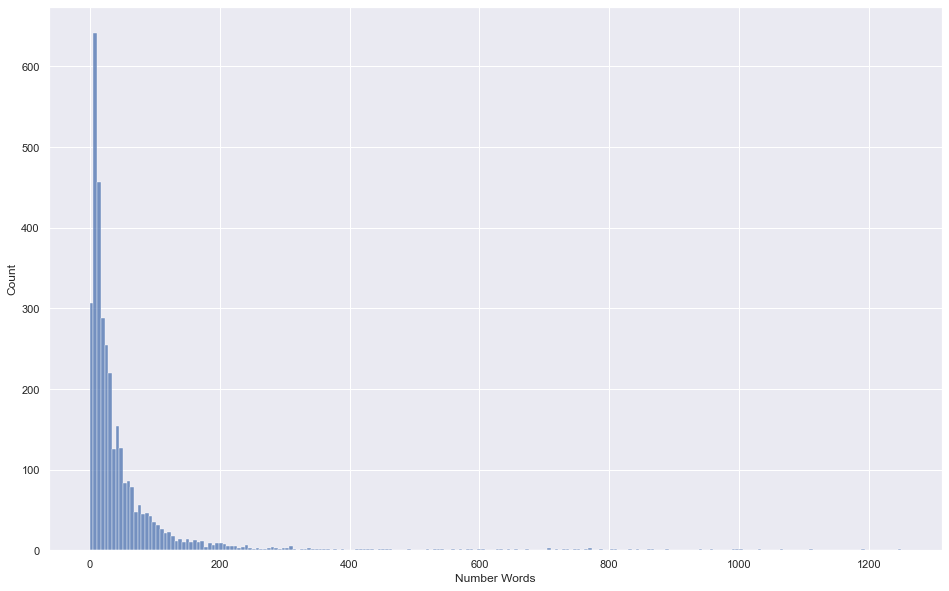

In [31]:
num_words = df['Number Words']
sns.set(rc={'figure.figsize':(16,10)})
sns.histplot(data=num_words)

> We can analyze that we have many tweets with a very small amount of characters. We can also analyze that we have few very large tweets. Something to watch out for is the presence of tweets with more than 280 characters.

# Most common words 

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

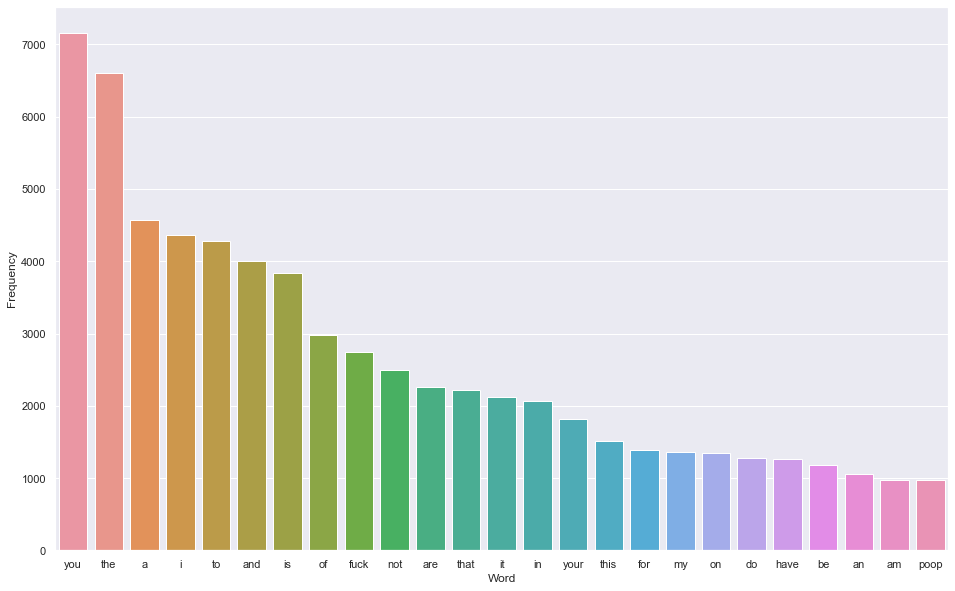

In [32]:
corpus = df['comment_text'].tolist()
word_count = Counter(" ".join(corpus).split()).most_common(25)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
sns.barplot(x="Word", y="Frequency", data=word_frequency)

> We can analyze that the vast majority of words that are repeated a lot are stopwords. However, we can see that there are a few words that are not necessarily stopwords appearing very often.

# Word Cloud 

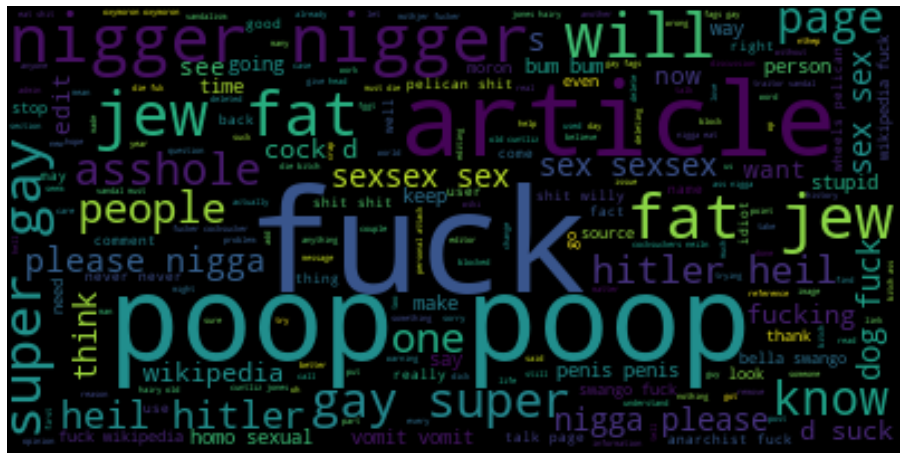

In [36]:
# Cloud WordsFor all Tweets 
corpus = df['comment_text'].tolist()
corpus_all = " ".join(corpus)

wordcloud = WordCloud().generate(corpus_all)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

>  Analyzing the dataset we can see in the word Cloud that bad words like: fuck,poop,super gay appear a lot in the text showing a very negative dataset. Words with a very positive meaning, such as good, appear very little.